<a href="https://colab.research.google.com/github/itsluckysharma01/Skin_Diseases_Detection_Using_Deep-Learning/blob/main/Skin_Diseases_Detection_Using_Deep_Learning(NOTEBOOK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                               Skin_Diseases_Detection_Using_Deep-Learning(NOTEBOOK)                           

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Unzip the dataset folder

In [5]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/DATASET/IMG_CLASSES_DATASET.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Import From Kaggle API


In [6]:
# %pip install --upgrade pip
# %pip uninstall -y tensorflow
# %pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Found existing installation: tensorflow 2.20.0
Uninstalling tensorflow-2.20.0:
  Successfully uninstalled tensorflow-2.20.0
  Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
Using cached tensorflow-2.20.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (620.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.


In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS = 50

In [8]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    r"/content/IMG_CLASSES_DATASET",  #Directory containing the dataset
    shuffle=True,  #Shuffle the dataset
    image_size=(IMAGE_SIZE,IMAGE_SIZE),  #Resize images to 256x256 pixels
    batch_size=BATCH_SIZE  #Batch size for training
    )

Found 17001 files belonging to 34 classes.


In [9]:
class_names = [name.split('(')[0].strip() for name in dataset.class_names]
class_names

['1. Eczema',
 '10. Warts Molluscum and other Viral Infections',
 '11. Pigment',
 '12. Enfeksiyonel',
 '13. Akne',
 '14. Enfeksiyonel',
 '15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 '16. Bullous Disease Photos',
 '17. Cellulitis Impetigo and other Bacterial Infections 288',
 '18. Exanthems and Drug Eruptions',
 '19. Hair Loss Photos Alopecia and other Hair Diseases 239',
 '2. Melanoma',
 '20. Herpes HPV and other STDs Photos 405',
 '21. Light Diseases and Disorders of Pigmentation 568',
 '22. Lupus and other Connective Tissue diseases',
 '23. Nail Fungus and other Nail Disease 500',
 '24. Poison Ivy Photos and other Contact Dermatitis',
 '25. Rosacea Photos',
 '26. Scabies Lyme Disease and other Infestations and Bites',
 '27. Seborrheic Keratoses and other Benign Tumors',
 '28. Systemic Disease',
 '29. Tinea Ringworm Candidiasis and other Fungal Infections',
 '3. Atopic Dermatitis',
 '30. Urticaria Hives',
 '31. Vascular Tumors',
 '32. Vasculitis Photos',


In [10]:
len(dataset)

133

In [11]:
133*128

17024

# 16512 images in total last batch was not proper
# 128 was Batch size

# EXPLORE DATA

In [12]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(128, 256, 256, 3)
[25 31 31 32  4 24 29 21 22  2 10 14 17 19 10 31 18 15  7 31  0  6 17  1
 29 11 27 31  7 32 25  7  1 18 19 21 26  3 13 20 18  8 11  5  1  9  6 19
 32  7 25 26 11 11  7  0  1 23 17 24 31 13 15 32 28 11  9 20 10 21 26 13
  2 24 12 15 33 12 29 10 30 27 24 19 24 21 31 22 26 25 20 16  6 24  2 22
 11 10 16  4 14 25 11 27 18 27 33  6  5 28 29 29  7 10 12  8 29 28 32 17
  9  5 18 29  0 27  2  0]


(128, 256, 256, 3)


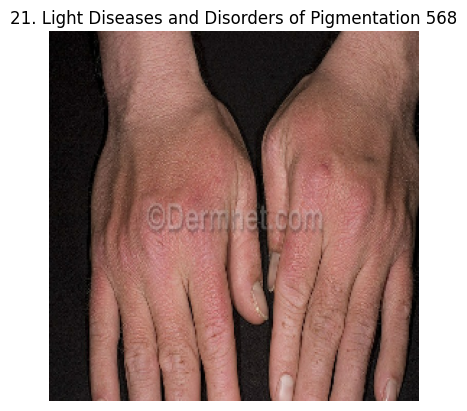

In [13]:
for image_batch, labels_batch in dataset.take(1):
    # print(image_batch[0]) # it will give image as a tensor
    # print(image_batch[0].numpy()) # it will give label as a numpy array
    print(image_batch.shape)  # (32, 256, 256, 3) 32 images of size 256x256 with 3 channels
    plt.imshow(image_batch[0].numpy().astype("uint8"))  # Display the first image
    plt.axis("off")  # Hide the axis
    plt.title(class_names[labels_batch[0]])  # Display the label of the first

# Display a batch of images

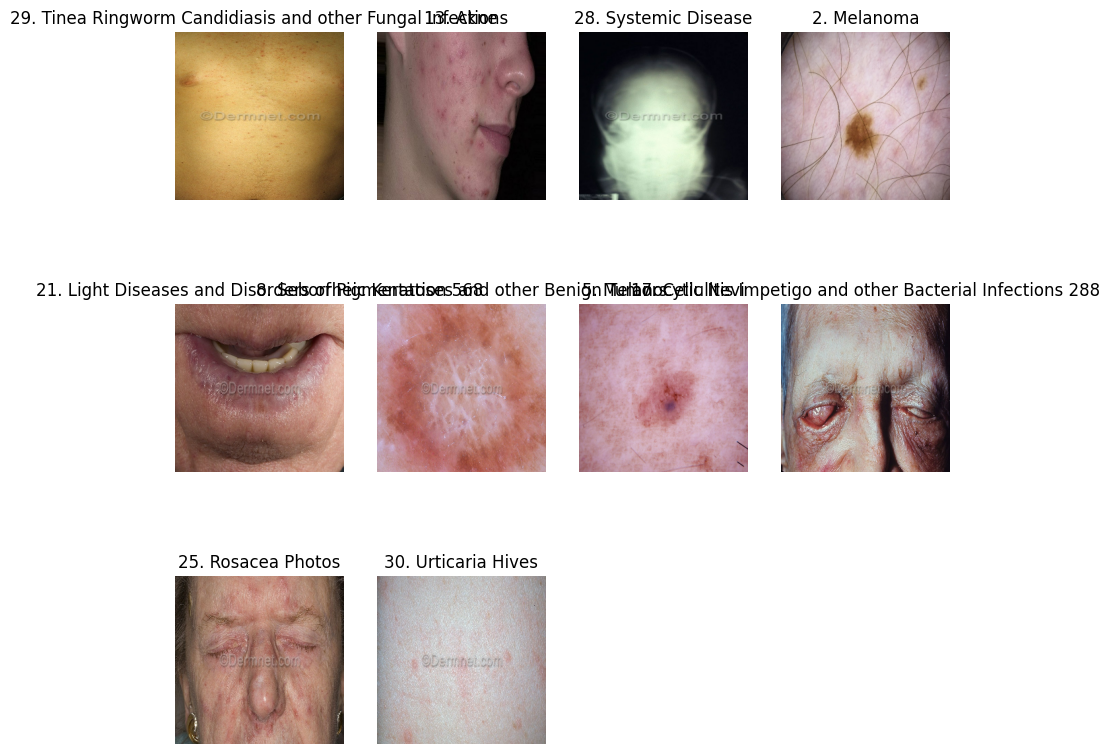

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")


# **Reasoning**:
Iterate through the dataset to count the number of images in each class and store the counts in a dictionary.


In [15]:
from collections import Counter

class_counts = Counter()
for _, labels_batch in dataset:
    class_counts.update(labels_batch.numpy())

sorted_class_counts = sorted(class_counts.items(), key=lambda item: item[0])

for class_index, count in sorted_class_counts:
    print(f"Class {class_names[class_index]}: {count} images")

Class 1. Eczema: 500 images
Class 10. Warts Molluscum and other Viral Infections: 500 images
Class 11. Pigment: 500 images
Class 12. Enfeksiyonel: 500 images
Class 13. Akne: 322 images
Class 14. Enfeksiyonel: 500 images
Class 15. Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 500 images
Class 16. Bullous Disease Photos: 448 images
Class 17. Cellulitis Impetigo and other Bacterial Infections 288: 288 images
Class 18. Exanthems and Drug Eruptions: 404 images
Class 19. Hair Loss Photos Alopecia and other Hair Diseases 239: 239 images
Class 2. Melanoma: 1000 images
Class 20. Herpes HPV and other STDs Photos 405: 405 images
Class 21. Light Diseases and Disorders of Pigmentation 568: 568 images
Class 22. Lupus and other Connective Tissue diseases: 420 images
Class 23. Nail Fungus and other Nail Disease 500: 500 images
Class 24. Poison Ivy Photos and other Contact Dermatitis: 260 images
Class 25. Rosacea Photos: 500 images
Class 26. Scabies Lyme Disease and other Infestat

In [16]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Get the true labels from the dataset
all_labels = []
for _, labels_batch in dataset:
    all_labels.extend(labels_batch.numpy())

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(all_labels),
    y=all_labels
)

class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(1.0000588235294117), 1: np.float64(1.0000588235294117), 2: np.float64(1.0000588235294117), 3: np.float64(1.0000588235294117), 4: np.float64(1.5528863719400803), 5: np.float64(1.0000588235294117), 6: np.float64(1.0000588235294117), 7: np.float64(1.1161370798319328), 8: np.float64(1.7362132352941178), 9: np.float64(1.2376965637740245), 10: np.float64(2.092173270982033), 11: np.float64(0.5000294117647058), 12: np.float64(1.234640522875817), 13: np.float64(0.8803334714167357), 14: np.float64(1.190546218487395), 15: np.float64(1.0000588235294117), 16: np.float64(1.9231900452488688), 17: np.float64(1.0000588235294117), 18: np.float64(1.1601610481779718), 19: np.float64(1.0000588235294117), 20: np.float64(0.8251310425160163), 21: np.float64(1.0000588235294117), 22: np.float64(1.0000588235294117), 23: np.float64(2.3586293007769146), 24: np.float64(1.037405418598975), 25: np.float64(1.201993778280543), 26: np.float64(1.0000588235294117), 27: np.float64(0.5000294117

# Split the DATASET

In [17]:
train_size = 0.8
len(dataset)*train_size

106.4

In [18]:
train_ds=dataset.take(106)  # 106 batches for training
len(train_ds)

106

For test and validation we will use 10% each

In [19]:
test_ds=dataset.skip(106)  # Skip the first 106 batches for validtion and test
len(test_ds)  # 14 batches for validation and test

27

In [20]:
val_size = 0.1
len(dataset)*val_size

13.3

In [21]:
val_ds=test_ds.take(13)  # 13 batches for validation
len(val_ds)

13

In [22]:
test_ds=test_ds.skip(6)  # 13 batches for validation
len(test_ds)

21

# Function to Split Dataset into Train, Test and Validation

In [23]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=1000):

    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)


    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [25]:
len(train_ds), len(val_ds), len(test_ds)

(106, 13, 14)

# Caching

for second iteration we will use the same dataset, so we will cache it to speed up the process. Data is in main memory.

In [26]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Pre-Processing

# Scaling

In [27]:
# resize_and_rescale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
#     layers.experimental.preprocessing.Rescaling(1.0/255)

# ])

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

# DataAugmention
for making model Robust

with diffferent angles, brightness, contrast, etc.

In [28]:

# data_augmentation = tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation(0.2)
# ])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

# Build the model
We are using CNN for train the data

In [35]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

model = models.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE, input_shape=input_shape),
    tf.keras.layers.Rescaling(1.0/255),
    # data_augmentation,   # Data augmentation

    # Apply 2D convolution (layers, kernel size, activation)
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2), # after CNN layer there is pooling layer max pooling or min #reduce size and preserve feature


    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)), layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),layers.Dropout(0.2),

    layers.Conv2D(64, kernel_size = (3,3) , activation='relu' ),
    layers.MaxPooling2D((2,2)),layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes , activation='softmax')  # Output layer with softmax

])



In [36]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_4 (Resizing)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,762 (725.63 KB)

 Trainable params: 185,762 (725.63 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))



In [38]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)



In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS ,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    class_weight=class_weights_dict # Use the calculated class weights
)

Epoch 1/50


In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history

In [ ]:

history.params

In [ ]:
history.history.keys()

In [ ]:
len(history.history['accuracy'])  # we can plot these history values in chart

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

we can plot these history values in chart

In [ ]:
plt.figure(figsize=(16, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Make a Prediction

In [ ]:

import numpy as np

In [ ]:
np.argmax([2.189804e-04, 9.080725e-01, 9.170856e-02])  # output of the below prediction

In [ ]:
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')  # Display the first image in the batch
    first_label = labels_batch[0]  # Get the label of the first image

    print("First image to predict: ")
    plt.imshow(first_image)
    print("First image's actual label: ", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Batch prediction: ", batch_prediction[0])
    # print(class_names[np.argmax(batch_prediction[0])])  # Display the predicted label for the first image
    print("Predicted label: ", class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

In [ ]:
plt.figure (figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        # ax = plt.subplot(3, 4, i + 1)
        # plt.imshow(image_batch[i].numpy().astype("uint8"))
        # predicted_class, confidence = predict(model, image_batch)
        # plt.title(f"Predicted: {predicted_class} ({confidence}%)")
        # plt.axis("off")
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]]

        plt.title(f"Predicted: {predicted_class} ({confidence}%)\nActual: {actual_class}.\n Confidence: {confidence}%")

        plt.axis("off")

# Save The Models

In [ ]:
import os

In [ ]:
model_version=1
model.save(f"../saved_models/{model_version}.keras")

# 2nd version

In [ ]:
model_version=2
model.save(f"../saved_models/{model_version}")

# Auto increment version number and models saved

In [ ]:
import os
# Get all folder/file names that are digits, convert to int, or use 0 if none
existing_versions = [int(i) for i in os.listdir("../saved_models/") if i.isdigit()]
model_version = max(existing_versions, default=0) + 1
model.save(f"../saved_models/{model_version}.keras")

In [ ]:
import os
# Get all folder/file names that are digits, convert to int, or use 0 if none
existing_versions = [int(i) for i in os.listdir("../saved_models/") if i.isdigit()]
model_version = max(existing_versions, default=0) + 1
model.save(f"../saved_models/{model_version}.keras")  # Add .keras extension for Keras format

In [ ]:
model_version = 2
model.export(f"../models/{model_version}")